In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import wordnet as wn
import numpy as np
import sklearn as sk
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import operator

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true
!wget !wget https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_gold_labels.xlsx?raw=true

--2021-11-15 07:36:30--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/blob/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 07:36:30--  https://github.com/Dinesh-Adhithya-H/Natural-Language-Processing/raw/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised-Opinion-Mining/assignment3_data.xlsx [following]
--2021-11-15 07:36:30--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Natural-Language-Processing/main/Unsupervised

In [ ]:
data=pd.read_excel("assignment3_data.xlsx?raw=true")
data=np.array(data).flatten()

In [ ]:
data_true=np.array(pd.read_excel("assignment3_gold_labels.xlsx?raw=true")).flatten()

In [ ]:
data_true

array(['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence/knowledge', 'leadership', 'long term vision',
       'political skills ', 'relate to diverse groups', 'humble'],
      dtype=object)

In [ ]:
data_true=['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge']

In [ ]:
wn.wup_similarity(wn.synsets("happy")[0],wn.synsets("sad")[0])

In [ ]:
for i in data_true:
  print(len(wn.synsets(i)))

3
5
3
2
5
4
5
3
2
2
6
1


In [ ]:
def evaluation(x,y):
  score=0
  for i in x:
    syn1=wn.synsets(i.lower())
    cur_scores=[0]
    for j in y:
      syn2=wn.synsets(j.lower())
      if len(syn1)*len(syn2)>0 and wn.wup_similarity(syn1[0],syn2[0])!=None: 
        cur_scores.append(wn.wup_similarity(syn1[0],syn2[0]))
    #print(type(score),type(cur_scores))
    score+=max(cur_scores)
  return score/len(x)

In [ ]:
evaluation(["lol","happy"],["moron"])

0.0

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
vocab=[]
for i in data:
  i=i.rstrip(".")
  for j in i.split(" "):
    j=j.strip(",")
    j=j.lower()
    if j not in stop_words:
      vocab.append(j.lower())

In [ ]:
vocab_similar=[]
for i in vocab:
  syn=wn.synsets(i)
  if len(syn)!=0:
    sel=syn[0]
    for k in syn:
      if k.name().split(".")[1]=="a":
        sel=k
      break
    for j in sel.lemmas():
      vocab_similar.append(j.name())
  vocab_similar.append(i)

In [ ]:
from collections import defaultdict,OrderedDict
frequency_counter=defaultdict(int)
for i in vocab_similar:
  frequency_counter[i]+=1
frequency_counter = sorted(frequency_counter.items(), key=lambda x: x[1])    

In [ ]:
words_freq_counter=[]
freq=[]
for i in frequency_counter:
  if (i[1]>5):
    print(i[0],end=" ")
    words_freq_counter.append(i[0])
    freq.append(i[1])

country people integrity honestness determination intelligence good president smart experience leading honesty leadership 

In [ ]:
words_freq_counter

['country',
 'people',
 'integrity',
 'honestness',
 'determination',
 'intelligence',
 'good',
 'president',
 'smart',
 'experience',
 'leading',
 'honesty',
 'leadership']

Text(0, 0.5, 'Word Frequency')

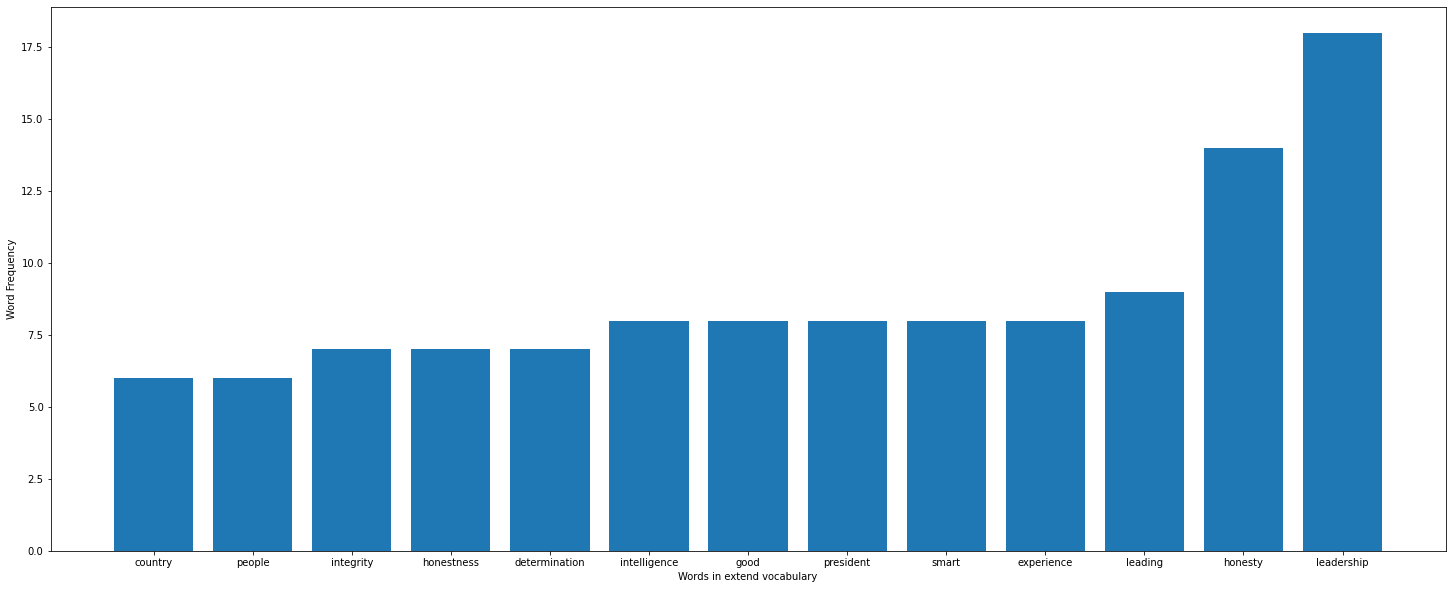

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(words_freq_counter ,freq )
plt.xlabel("Words in extend vocabulary")
plt.ylabel("Word Frequency")

In [ ]:
evaluation(words_freq_counter,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.6593918901611209

In [ ]:
def sim(mat):
    thres = 0.8
    l = []
    for i in mat:
        m = []
        for j in mat:
          if len(wn.synsets(i))*len(wn.synsets(j))>0:
            si = wn.wup_similarity(wn.synsets(i)[0],wn.synsets(j)[0])
            if(si == None):
                continue
            if(si > thres):
                m.extend((i,j))
        l.append(m)
    return l

S = sim(vocab_similar)

In [ ]:
S1 = []
for i in S:
    if len(set(i)) >= 1:
        S1.append(list(set(i)))

In [ ]:
dict1 = {}
for i in set(vocab_similar):
    for j in S1:
        for k in j:
            if(i in wn.synsets(k)[0].lemma_names()):
                dict1[i] = sorted(list(set(j)))

In [ ]:
dict2 = {}
for key, value in dict1.items():
    dict2[tuple(value)] = key

dict1 = {}
for k, v in dict2.items():
    dict1[v] = list(k)

In [ ]:

p = []
q = []
for x, y in dict1.items():
    a = []
    p.append(x)
    for i in y:
        a.append(wn.synsets(i)[0].lemma_names())
    q.append(sum(a, []))

r = []
for i in q:
    r.append(sorted(list(set(i))))

t = []
for i in list(dict1.values()):
    z = []
    for j in i:
        z.append(wn.synsets(j)[0].name())
    t.append(z)

for i in range(len(r)):
    r[i].append(t[i])

for i in r:
    for j in i:
        if isinstance(j,list):
            for k in j:
                i.append(k)
            i.remove(j)

In [ ]:
df = pd.DataFrame(columns = ["Word","Frequency","Clusters"])
df["Word"] = p
df["Clusters"] = r

In [ ]:
df

,Word,Frequency,Clusters
0,park,NaN,"[common, commons, green, park, parkland, park...."
1,juncture,NaN,"[articulation, join, joint, junction, juncture..."
2,politics,NaN,"[political_relation, politics, politics.n.01, ..."
3,grouping,NaN,"[group, grouping, people, group.n.01, group.n...."
4,entreaty,NaN,"[appeal, entreaty, prayer, entreaty.n.01, entr..."
...,...,...,...
106,sophisticate,NaN,"[sophisticate, sophisticate.v.01]"
107,able,NaN,"[able, able.a.01]"
108,political,NaN,"[political, political.a.01]"
109,politically,NaN,"[politically, politically.r.01]"


In [ ]:
frq = []
for x, y in df.iterrows():
    f = 0
    for i in range(len(y["Clusters"])):
        f += vocab_similar.count(y.Clusters[i])
    frq.append(f)

df["Frequency"] = frq
df = df.sort_values(by = ["Frequency"], ascending = False)

In [ ]:
pd.set_option('display.width', 1000)


In [ ]:
df

,Word,Frequency,Clusters
11,work,32,"[business, job, leadership, leading, line, lin..."
41,plenty,28,"[batch, deal, flock, good_deal, great_deal, ha..."
27,quality,26,"[honestness, honesty, kindness, morality, qual..."
35,body_politic,24,"[body_politic, commonwealth, country, land, na..."
49,intelligence,19,"[accomplishment, acquirement, acquisition, att..."
...,...,...,...
88,BASIC,1,"[BASIC, basic.n.01, basic.n.01]"
106,sophisticate,1,"[sophisticate, sophisticate.v.01]"
60,Nice,1,"[Nice, nice.n.01, nice.n.01]"
94,International,1,"[International, international.n.01, internatio..."


In [ ]:
df.to_csv()

',Word,Frequency,Clusters\n11,work,32,"[\'business\', \'job\', \'leadership\', \'leading\', \'line\', \'line_of_work\', \'occupation\', \'work\', \'occupation.n.01\', \'leadership.n.01\', \'work.n.01\']"\n41,plenty,28,"[\'batch\', \'deal\', \'flock\', \'good_deal\', \'great_deal\', \'hatful\', \'heap\', \'lot\', \'mass\', \'mess\', \'mickle\', \'mint\', \'mountain\', \'muckle\', \'passel\', \'peck\', \'pile\', \'plenty\', \'pot\', \'quite_a_little\', \'raft\', \'sight\', \'slew\', \'spate\', \'stack\', \'tidy_sum\', \'wad\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\', \'batch.n.02\']"\n27,quality,26,"[\'honestness\', \'honesty\', \'kindness\', \'morality\', \'quality\', \'honesty.n.01\', \'honesty.n.01\', \'kindness.n.01\', \'morality.n.01\', \'quality.n.01\', \'quality.n.01\']"\n35,body_politic,24,"[\'body_politic\', \'commonwealth\', \'co

In [ ]:
print(df.iloc[0:10]["Clusters"])

11    [business, job, leadership, leading, line, lin...
41    [batch, deal, flock, good_deal, great_deal, ha...
27    [honestness, honesty, kindness, morality, qual...
35    [body_politic, commonwealth, country, land, na...
49    [accomplishment, acquirement, acquisition, att...
22    [integrity, unity, wholeness, integrity.n.01, ...
59    [smart, smarting, smartness, smart.n.01, smart...
23    [individual, mortal, person, somebody, someone...
46    [apprehension, discernment, knowing, savvy, se...
43    [conclusion, decision, determination, parti_pr...
Name: Clusters, dtype: object


In [ ]:
evaluation(list(df["Word"][1:15]),['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.5445152070152071

In [ ]:
list(df["Word"][1:15])

['plenty',
 'quality',
 'body_politic',
 'intelligence',
 'wholeness',
 'smartness',
 'somebody',
 'apprehension',
 'decision',
 'resolution',
 'equanimity',
 'run',
 'grouping',
 'tending']

Text(0, 0.5, 'Cluster Frequency')

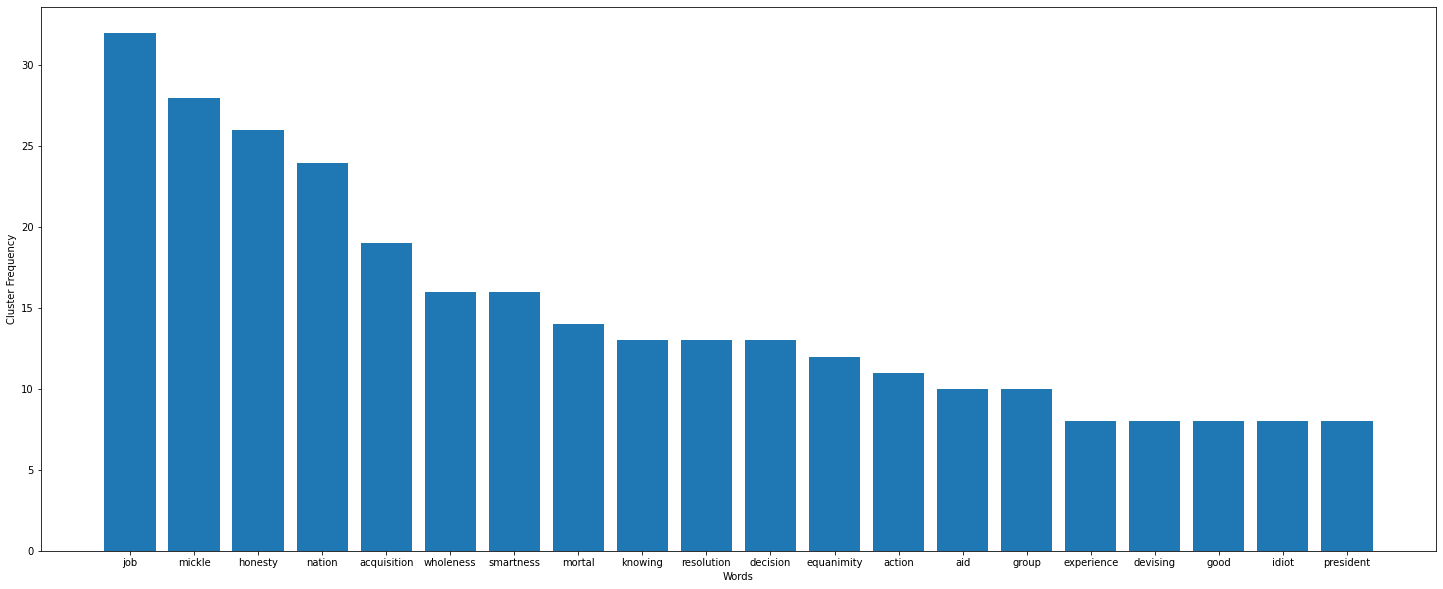

In [ ]:
plt.figure(figsize=(25,10))
plt.bar(df["Word"][:20] ,df["Frequency"][:20] )
plt.xlabel("Words")
plt.ylabel("Cluster Frequency")

In [ ]:
vocab_similar=list(set(vocab_similar))

In [ ]:
wn.wup_similarity(wn.synsets(vocab_similar[0])[0],wn.synsets(vocab_similar[10])[0])

0.125

In [ ]:
distance_matrix=np.zeros((len(vocab_similar),len(vocab_similar)))

In [ ]:
network_words=nx.Graph()
for i in range(len(vocab_similar)):
  for j in range(0,i):
    try:
      s1=wn.synsets(vocab_similar[i].lower())[0]
      s2=wn.synsets(vocab_similar[j].lower())[0]
      if wn.wup_similarity(s1,s1)>0.9:
        network_words.add_edge(vocab_similar[i],vocab_similar[j])
        #network_words[vocab_similar[i]][vocab_similar[j]]['weight'] =1
    except:
      pass
      #network_words[vocab_similar[i]][vocab_similar[j]]['weight'] = 0.0

In [ ]:
degcent=sorted([i for i in nx.degree_centrality(network_words).values() ],reverse=True)
deg_cent=nx.degree_centrality(network_words)

In [ ]:
a=0
words=[]
for w in sorted(deg_cent, key=deg_cent.get, reverse=True):
    print(w)
    a+=1
    words.append(w)
    if a==15:
      break

attainment
quite_a_little
think
carry_through
knowledge
qualify
sense
confident
run
work
need
preferably
apprehension
come
time


In [ ]:
evaluation(words,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.5293610093610093

In [ ]:
#plt.figure(figsize=(30,30))
#pos=nx.kamada_kawai_layout(network_words)
#nx.draw_networkx(network_words);

In [ ]:
pg=nx.pagerank(network_words,weight="weight")
words=sorted(pg.items(),key=operator.itemgetter(1),reverse=True)[0:15]

In [ ]:
words1=[]
for i in words:
  words1.append(i[0])

In [ ]:
words1

['attainment',
 'quite_a_little',
 'think',
 'carry_through',
 'knowledge',
 'qualify',
 'sense',
 'confident',
 'run',
 'work',
 'need',
 'preferably',
 'apprehension',
 'come',
 'time']

In [ ]:
evaluation(words1,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.5293610093610093

In [ ]:
for i in range(len(vocab_similar)):
  for j in range(i+1):
    if len(wn.synsets(vocab_similar[i]))!=0 and len(wn.synsets(vocab_similar[j]))!=0: 
      if i==j:
        distance_matrix[i][j]=wn.wup_similarity(wn.synsets(vocab_similar[i])[0],wn.synsets(vocab_similar[j])[0])
      else:
        distance_matrix[i][j]=wn.wup_similarity(wn.synsets(vocab_similar[i])[0],wn.synsets(vocab_similar[j])[0])
        distance_matrix[j][i]=wn.wup_similarity(wn.synsets(vocab_similar[i])[0],wn.synsets(vocab_similar[j])[0])

In [ ]:
distance_matrix=1-np.nan_to_num(distance_matrix)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='precomputed', distance_threshold=0.0,n_clusters=None,linkage='complete',compute_full_tree=True)
cluster.fit(1-np.nan_to_num(distance_matrix))

AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                        connectivity=None, distance_threshold=0.0,
                        linkage='complete', memory=None, n_clusters=None)

In [ ]:
acluster=[]
for i in range(len(cluster.labels_)):
  if cluster.labels_[i] in list(range(15)): 
    print(cluster.labels_[i],vocab_similar[i]) #cluster.labels_[i],
    acluster.append(vocab_similar[i])

12 body_politic
11 management
13 political
10 morality.
9 retard
14 goal
7 committedness
8 international
6 trying
4 trusty
5 thought
2 controlling
3 politically
1 sooner
0 background


In [ ]:
acluster

['body_politic',
 'management',
 'political',
 'morality.',
 'retard',
 'goal',
 'committedness',
 'international',
 'trying',
 'trusty',
 'thought',
 'controlling',
 'politically',
 'sooner',
 'background']

In [ ]:
evaluation(acluster,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.4211810411810412

In [ ]:
for i in range(len(cluster.labels_)):
  if cluster.labels_[i]==9:
    print(cluster.labels_[i],vocab_similar[i])

9 retard


In [ ]:
from scipy.cluster.hierarchy import dendrogram
import  matplotlib.pyplot as plt
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(30,10))
    dendrogram(linkage_matrix,**kwargs)



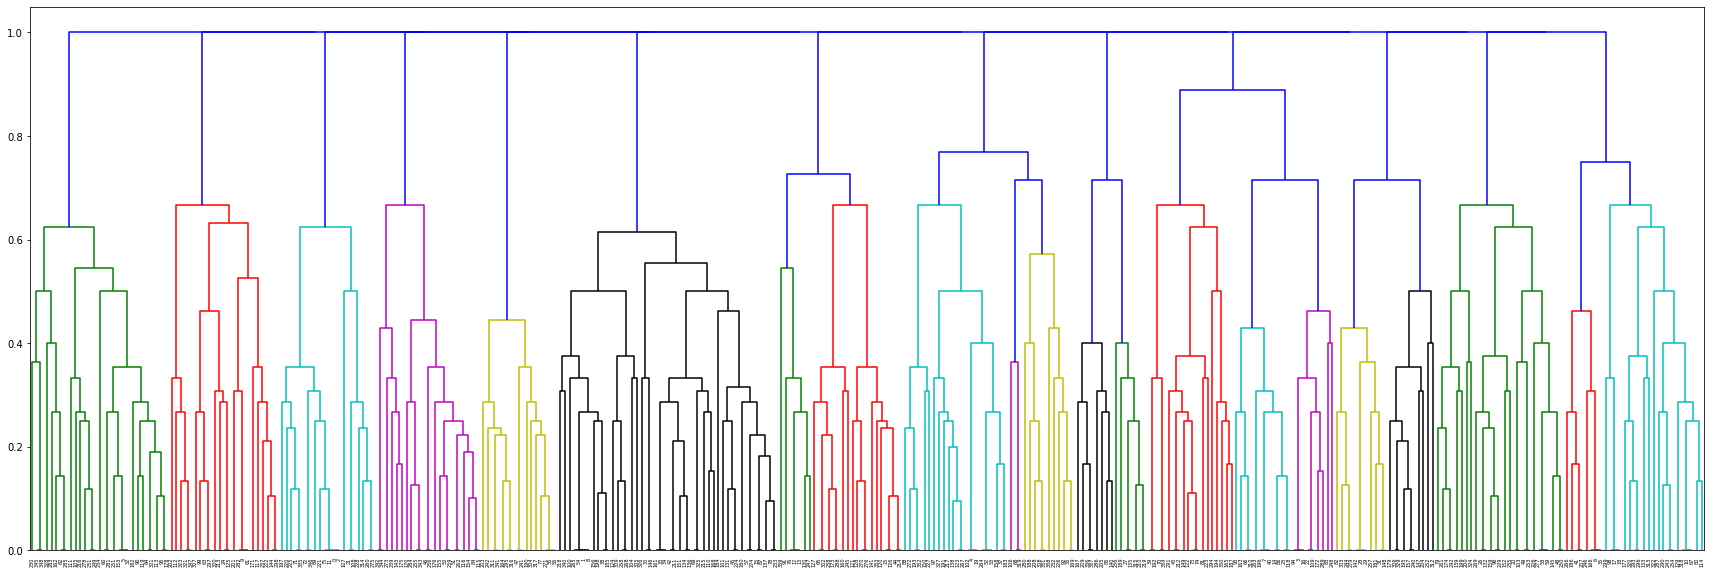

In [ ]:
plot_dendrogram(cluster, truncate_mode="level")

In [ ]:
cluster.labels_

array([348, 347, 241, 345, 344, 343, 342, 341, 213, 339, 338, 346, 336,
       287, 334, 333, 250, 331, 208, 198, 328, 327, 326, 325, 324, 323,
       322, 321, 320, 319, 318, 317, 192, 315, 160, 214, 312, 311, 310,
       309, 257, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298, 297,
       296, 158, 340, 293, 277, 291, 290, 295, 288, 173, 286, 285, 284,
       283, 282, 171, 280, 279, 278, 138, 276, 275, 194, 337, 335, 243,
       274, 179, 223, 211, 141, 139, 273, 222, 292, 193, 178, 169, 212,
       209, 221, 281, 332, 272, 271, 187, 330, 220, 207, 168, 329, 162,
       199, 140, 316, 203, 264, 167, 204, 205, 137, 242, 224, 216, 195,
       136, 256, 150, 184,  83, 237, 270, 166,  69, 196, 135, 219, 267,
       210, 234, 231, 197, 269, 260, 244, 246, 245, 120, 161, 265, 159,
       202, 268, 104, 188, 239, 313, 175, 238, 240, 235, 157, 121, 103,
       174, 133, 200, 119, 233, 314, 206, 102, 218,  99, 156, 263, 217,
       145, 261, 180, 101, 266, 132, 165, 255, 164, 118, 163, 25

In [ ]:
cluster_21 = AgglomerativeClustering(affinity='precomputed', distance_threshold=None,n_clusters=21,linkage='complete',compute_full_tree=True)
cluster_21.fit(1-np.nan_to_num(distance_matrix))

AgglomerativeClustering(affinity='precomputed', compute_full_tree=True,
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=21)

In [ ]:
for i in range(len(cluster_21.labels_)):
  if cluster_21.labels_[i]==20:
    print(vocab_similar[i])

courageousness
county
prejudice
important
half-wit
eloquent
acquisition
honest
lovingness
proud
orient
approachable


In [ ]:
from sklearn.cluster import AffinityPropagation
from collections import Counter
ap = AffinityPropagation(max_iter=1000)
ap.fit(1-np.nan_to_num(distance_matrix))
res = Counter(ap.labels_)
res.most_common(10)

[(2, 41),
 (16, 37),
 (11, 33),
 (3, 27),
 (14, 26),
 (4, 24),
 (13, 24),
 (9, 18),
 (10, 18),
 (0, 17)]

In [ ]:
ap_cluster=[]
for i in ap.cluster_centers_indices_:
  print(vocab_similar[i])
  ap_cluster.append(vocab_similar[i])

turn_over
class
acquisition
logical
direction
silver
passel
resolution
friendly
passionateness
acquirement
decisiveness
oriented
sight
leader
carry_through
morality.
trying


In [ ]:
evaluation(ap_cluster,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.3881636881636882

In [ ]:
ap.labels_

array([ 2, 13, 11, 10,  0,  1,  7,  8,  2,  0, 11,  3,  8, 10,  2,  0,  4,
        0,  0,  0, 10,  0,  5,  1,  3,  9,  0, 15, 15,  7,  0,  8,  1,  2,
        2,  8, 13,  0,  9, 10,  5,  5,  7,  2,  7,  1,  8,  4,  0, 10,  0,
        8,  3,  8,  0,  8,  0, 11, 12,  2, 12,  2,  1,  3,  0, 10, 10,  8,
        8,  1,  3, 11,  1,  8,  0,  1,  0,  4,  7,  7,  5, 13,  5, 10,  2,
        6,  7,  7,  3,  5,  2, 12,  2,  5,  4,  0,  8,  5,  5,  5,  5,  2,
        2,  2,  6, 10,  2, 10, 15, 13, 12,  0,  8,  3, 12,  0,  0,  3, 12,
        3,  4,  8,  5, 13, 15,  8,  3, 15,  3,  8,  0,  8,  2, 15, 15,  5,
        6,  9,  7,  8,  5,  6,  5,  1,  6, 13,  6,  0,  7,  4, 11,  5,  8,
        7,  6, 10,  8,  6,  8,  5, 12,  0,  9, 10,  3,  5,  2,  8,  6,  0,
       12,  0,  0,  3,  0,  0,  2, 13, 11, 11,  0,  4, 15,  7,  0,  6,  1,
        6, 15,  2,  5,  6, 15,  1,  2, 11,  8, 13, 15,  2,  7,  1,  1,  8,
       15,  6,  6,  2, 12,  1,  5,  8,  2, 10,  1,  2, 12,  8, 12,  5,  3,
       14,  8,  5, 10,  2

In [ ]:
filtered_clusters = [item[0] for item in res.most_common(5)]

In [ ]:
for i in filtered_clusters:
  print("------------------cluster no.",i,"------------------")
  for j in range(len(ap.labels_)):
    if i==ap.labels_[j]:
      print(vocab_similar[j])

------------------cluster no. 2 ------------------
sociology
thought
idea
experience
value-system
prejudices
fictitious_character
ideas
sight
attention
fictional_character
motivation
understanding
character
savvy
whole
discernment
motives
conclusion
goals
skills
preconception
skill
acquirement
think
sense
prejudice
bias
point
knowing
value_orientation
knowledge
cognition
ethic
noesis
moral_principle
motive
intelligence
smarting
smart
goal
smartness
------------------cluster no. 1 ------------------
maturate
levelheadedness
deliberate
sure.
others.
trustworthiness.
intelligence.
inclusivity
umm
morality.
important
underprivileged
hard
crucial
immense
subterraneous
silver-tongued
trustworthy
i'm
intelligent
u.s
proud
honesty.
peaceable
fluent
genuine
political
exceptionally
subterranean
others
stressful
selfless
nerve-racking
polite
eloquent
Brobdingnagian
honorable
peaceful
vast
level-headed
ability.
------------------cluster no. 8 ------------------
moot
dealings
time
run
leadership
ap

In [ ]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.cluster import hierarchy
y=1-np.nan_to_num(distance_matrix)

In [ ]:
Z = ward(y)

In [ ]:
fc=fcluster(Z, 0.0, criterion='distance')

In [ ]:
Z

array([[  2.        ,  16.        ,   0.        ,   2.        ],
       [ 32.        , 349.        ,   0.        ,   3.        ],
       [ 67.        , 350.        ,   0.        ,   4.        ],
       ...,
       [691.        , 692.        ,  22.76520316, 197.        ],
       [687.        , 693.        ,  32.02832528, 152.        ],
       [694.        , 695.        ,  54.2048631 , 349.        ]])

In [ ]:
fc

array([231, 172, 265, 182, 147,  17,   7, 107, 301, 117,  62, 299, 302,
        18, 226, 187, 265, 300,  82, 322,  60, 118,  19,  57,  63, 165,
       179, 180, 297, 148,  84, 205, 265, 298, 173, 320, 214,  20, 218,
       120, 321,  58, 151, 127, 234,  21,   4,   4, 210, 121, 225, 151,
       303, 128, 318, 306,  66, 159, 304, 100, 129, 316, 209, 212, 185,
       167, 209, 265,  83, 132,   8, 199, 132, 305,  59, 311, 311, 219,
       307, 108, 168, 143,   9, 122, 246,  74, 313, 326, 131, 181, 223,
       112,  33,  13, 280, 248, 249,  49, 314,  25, 141, 170, 308, 323,
       183,  61,  11,  46, 324, 325, 224,  85,  12,  79, 213, 235, 186,
       134, 282, 152, 176, 101, 222, 250, 130, 309, 265, 133, 211, 133,
       153, 232, 319, 142, 251, 265,   1,  67, 236,   5, 227, 161, 317,
       203, 252,  31, 286,  22, 288, 188,  10, 197,  14, 284,  70, 115,
       177, 255, 202,  80,  23, 289,  26,  87, 190, 202, 265, 139,  55,
       315,  90,  51, 160, 257, 247,   6, 138,  92, 200, 166, 12

In [ ]:
ward_hcluster=[]
for i in range(len(fc)):
  if fc[i] in list(range(21)):
    print(fc[i],vocab_similar[i])
    ward_hcluster.append(vocab_similar[i])

17 prayer
7 finding
18 job
19 command
20 appeal
4 promises
4 promise
8 fashioning
9 devising
13 acquisition
11 stay
12 leadership
1 tally
5 determination
10 making
14 deal
6 solving
15 appeals
3 serve
2 run
16 entreaty


In [ ]:
for i in ward_hcluster:
  print(i,end=" ")

prayer finding job command appeal promises promise fashioning devising acquisition stay leadership tally determination making deal solving appeals serve run entreaty 

In [ ]:
evaluation(ward_hcluster,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.7458952631884962

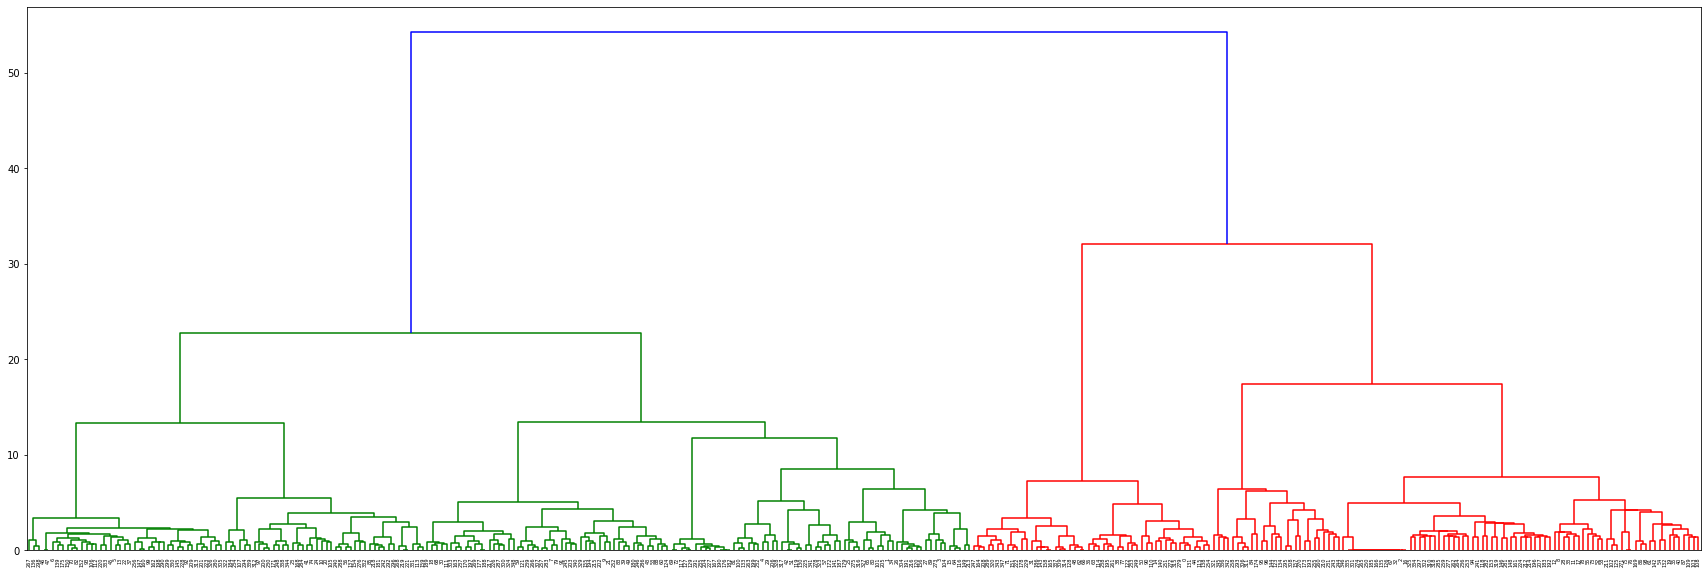

In [ ]:
plt.figure(figsize=(30,10))
hierarchy.dendrogram(Z)
plt.show()

In [ ]:
y

array([[1.        , 0.13333333, 0.        , ..., 0.        , 0.35294118,
        0.15384615],
       [0.13333333, 1.        , 0.        , ..., 0.        , 0.14285714,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35294118, 0.14285714, 0.        , ..., 0.        , 1.        ,
        0.16666667],
       [0.15384615, 0.33333333, 0.        , ..., 0.        , 0.16666667,
        1.        ]])

In [ ]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(y)
  inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Cummulative Inertia')

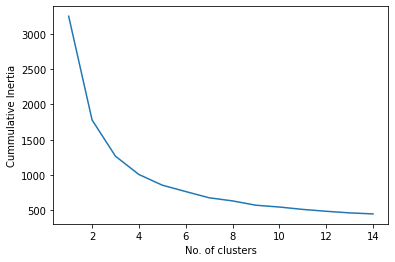

In [ ]:
plt.plot(list(range(1,15)),inertia)
plt.xlabel("No. of clusters")
plt.ylabel("Cummulative Inertia")

In [ ]:
kmeans_best = KMeans(n_clusters=4, random_state=0).fit(y)

In [ ]:
from numpy import dot
from numpy.linalg import norm

In [ ]:
km_cluster=[]
for i in kmeans_best.cluster_centers_:
  for j in range(len(y)):
    if dot(y[j],i)/(norm(y[j])*norm(i))<0.03:
      print(vocab_similar[j])
      km_cluster.append(vocab_similar[j])

politically
politically
politically
politically


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [ ]:
evaluation(km_cluster,['confident', 'determination', 'diplomacy', 'honesty',
       'intelligence', 'leadership', 'vision',
       'political','skills', 'diversity', 'humble','knowledge'])

0.0